## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[(df.landing_page == 'new_page')&(df.group == 'control')].shape[0] + df[(df.landing_page == 'old_page')&(df.group == 'treatment')].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
n1 = df[(df.landing_page == 'old_page')&(df.group == 'control')]
n2 = df[(df.landing_page == 'new_page')&(df.group == 'treatment')]
df2 = pd.concat([n1, n2], keys=['control', 'treatment'], axis = 0)
df2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
290580,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
290581,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
290582,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
290583,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.head()

user_id                   timestamp    group landing_page  \
control 0   851104  2017-01-21 22:11:48.556739  control     old_page   
        1   804228  2017-01-12 08:01:45.159739  control     old_page   
        4   864975  2017-01-21 01:52:26.210827  control     old_page   
        5   936923  2017-01-10 15:20:49.083499  control     old_page   
        7   719014  2017-01-17 01:48:29.539573  control     old_page   

           converted  
control 0          0  
        1          0  
        4          1  
        5          0  
        7          0

In [11]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 290585 entries, ('control', 0) to ('treatment', 294477)
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 24.7+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.duplicated().sum()

1

b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.user_id.duplicated()]

,,user_id,timestamp,group,landing_page,converted
treatment,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset ="user_id", inplace = True)

In [16]:
df2.user_id.duplicated().sum()

0

In [17]:
df2

user_id                   timestamp      group landing_page  \
control   0        851104  2017-01-21 22:11:48.556739    control     old_page   
          1        804228  2017-01-12 08:01:45.159739    control     old_page   
          4        864975  2017-01-21 01:52:26.210827    control     old_page   
          5        936923  2017-01-10 15:20:49.083499    control     old_page   
          7        719014  2017-01-17 01:48:29.539573    control     old_page   
...                   ...                         ...        ...          ...   
treatment 294462   677163  2017-01-03 19:41:51.902148  treatment     new_page   
          294465   925675  2017-01-07 20:38:26.346410  treatment     new_page   
          294468   643562  2017-01-02 19:20:05.460595  treatment     new_page   
          294472   822004  2017-01-04 03:36:46.071379  treatment     new_page   
          294477   715931  2017-01-16 12:40:24.467417  treatment     new_page   

                  converted  
control   0               0  
          1               0  
          4               1  
          5               0  
          7               0  
...                     ...  
treatment 294462          0  
          294465          0  
          294468          0  
          294472          0  
          294477          0  

[290584 rows x 5 columns]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2[df2.converted == 1].shape[0] / df2.user_id.shape[0]

0.11959708724499628

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df_c = df2[df2.group == 'control']
df_c[df_c.converted == 1].shape[0]/df_c.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df_t = df2[df2.group == 'treatment']
df_t[df_t.converted == 1].shape[0]/df_t.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2[df2.landing_page == 'new_page'].shape[0]/df2.user_id.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

1. $H_{0} : p_{old} - p_{new} >= 0$
2. $H_{1} : p_{old} - p_{new} < 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [26]:
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]) 
new_page_converted.mean()

0.1196132406579038

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.12102647411099027

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
obs = new_page_converted.mean() - old_page_converted.mean()
obs

-0.001413233453086471

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]) 
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  28.,  192.,  735., 1767., 2662., 2582., 1364.,  541.,  109.,
          20.]),
 array([-0.004166  , -0.00330639, -0.00244678, -0.00158717, -0.00072757,
         0.00013204,  0.00099165,  0.00185126,  0.00271087,  0.00357048,
         0.00443009]),
 <BarContainer object of 10 artists>)

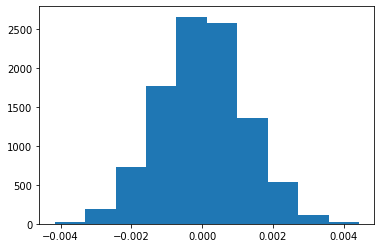

In [31]:
plt.hist(diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
df_co = df2[df2['group'] == 'control']
p_cont = df_co['converted'].mean()
p_cont

0.1203863045004612

In [33]:
df_tr = df2[df2['group'] == 'treatment']
p_treat = df_tr['converted'].mean()
p_treat

0.11880806551510564

In [34]:
acctual_diff =p_treat - p_cont
acctual_diff

-0.0015782389853555567

In [35]:
diffs = np.array(diffs)

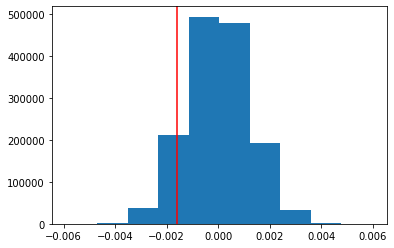

In [36]:
#Simulating the Null Hypothesis with Normal dist
null_val = np.random.normal(0, diffs.std(), df2.size)
plt.hist(null_val)
plt.axvline(x = acctual_diff, color = 'red')

In [37]:
#Calculating p-value:
(null_val > acctual_diff) .mean()

0.9032197230404978

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 - The value above represents the p-value of observing the statistic given the Null is true. As the p-value is large enough, we would fail to reject the Null hypothesis and keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df_co[df_co['converted'] == 1].shape[0]
convert_new = df_tr[df_tr['converted'] == 1].shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?


- The z-score and the p_value mean that one doesn't reject the Null. The Null being the converted rate of the old_page is the same or greater than the converted rate of the new_page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since this is a Yes-No type of variable, the appropriate approach is Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control', axis = 1)
df2.head()

user_id                   timestamp    group landing_page  \
control 0   851104  2017-01-21 22:11:48.556739  control     old_page   
        1   804228  2017-01-12 08:01:45.159739  control     old_page   
        4   864975  2017-01-21 01:52:26.210827  control     old_page   
        5   936923  2017-01-10 15:20:49.083499  control     old_page   
        7   719014  2017-01-17 01:48:29.539573  control     old_page   

           converted  intercept  treatment  
control 0          0          1          0  
        1          0          1          0  
        4          1          1          0  
        5          0          1          0  
        7          0          1          0

In [56]:
df_r = df2.rename(columns={'treatment': 'ab_page'})
df_r.head()

user_id                   timestamp    group landing_page  \
control 0   851104  2017-01-21 22:11:48.556739  control     old_page   
        1   804228  2017-01-12 08:01:45.159739  control     old_page   
        4   864975  2017-01-21 01:52:26.210827  control     old_page   
        5   936923  2017-01-10 15:20:49.083499  control     old_page   
        7   719014  2017-01-17 01:48:29.539573  control     old_page   

           converted  intercept  ab_page  
control 0          0          1        0  
        1          0          1        0  
        4          1          1        0  
        5          0          1        0  
        7          0          1        0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [59]:
df_r['intercept'] = 1

lm = sm.Logit(df_r['converted'],df_r[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [70]:
results.summary(),np.exp(results.params)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:              converted   No. Observations:               290584
 Model:                          Logit   Df Residuals:                   290582
 Method:                           MLE   Df Model:                            1
 Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               8.077e-06
 Time:                        15:29:14   Log-Likelihood:            -1.0639e+05
 converged:                       True   LL-Null:                   -1.0639e+05
 Covariance Type:            nonrobust   LLR p-value:                    0.1899
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
 ab_page       -0.0150      0.011     -1.311      0.190      -0.037   

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### in part|| 

1. $H_{0} : p_{old} - p_{new} >= 0$
2. $H_{1} : p_{old} - p_{new} < 0$

### in regression model

1. $H_{0} : p_{old} - p_{new} = 0$
2. $H_{1} : p_{old} - p_{new} \neq 0$
- The p-value associated with ab_page is 0.19, It is higher than 0.05
- In Part III, the alternative hypothesis can be formulated as follows: 
   the conversion rate of the old_page is different to the conversion rate of the new_page.
   This assumes a two-tailed test.  

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Considering other factors is a good idea as these factors may contribute to the significance of our test results and leads to more accurate decision, The disadvantage is it adds complexity, because variables may affect other variables. Also, some variables may not affect the outcome.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [61]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df_r.set_index('user_id'), how='inner')
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0


In [62]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [63]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [64]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [65]:
#consider US being our baseline
df_new.drop(['US'], axis=1, inplace=True)

In [71]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'CA', 'UK']])
result = logit_mod.fit()
result.summary(), np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:              converted   No. Observations:               290584
 Model:                          Logit   Df Residuals:                   290580
 Method:                           MLE   Df Model:                            3
 Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               2.323e-05
 Time:                        15:29:47   Log-Likelihood:            -1.0639e+05
 converged:                       True   LL-Null:                   -1.0639e+05
 Covariance Type:            nonrobust   LLR p-value:                    0.1760
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
 ab_page       -0.0149      0.011     -1.307      0.191      -0.037   

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [72]:
from patsy import dmatrices
y,x = dmatrices('converted ~ (country)*(landing_page) ', df_new, return_type = 'dataframe')
#change array into a contiguous flattened array.
y = np.ravel(y)
#craete the logistic model 
logit_mod = sm.Logit(y,x)
rseult = logit_mod.fit()
rseult.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        15:34:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -2.0715      0.037    -55.798      0.000      -2.144      -1.999
country[T.UK]                              0.0901      0.040      2.225      0.026       0.011       0.169
country[T.US]                              0.0644      0.038      1.679      0.093      -0.011       0.140
landing_page[T.old_page]                   0.0674      0.052      1.297      0.195      -0.034       0.169
country[T.UK]:landing_page[T.old_page]    -0.0783      0.057     -1.378      0.168      -0.190       0.033
country[T.US]:landing_page[T.old_page]    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==========================================================================================================
"""

In [74]:
np.exp(rseult.params)

Intercept                                 0.126002
country[T.UK]                             1.094247
country[T.US]                             1.066532
landing_page[T.old_page]                  1.069775
country[T.UK]:landing_page[T.old_page]    0.924703
country[T.US]:landing_page[T.old_page]    0.954198
dtype: float64

#### Summary and conclusion on regression
- The p_value for both interaction terms is higher than 0.05.

- Thus, the influence of landing_page in the US is not different to the influence of landing_page in the other countries.

- And the influence of landing_page in Canada is not different to the influence of landing_page in the other countries.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.